In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aqi-ml-data/city_day.csv
/kaggle/input/aqi-data/AirQualityUCI.csv


# <span style="font-family:cursive;text-align:center"> Import library</span>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, make_scorer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import joblib

### Import dataset

In [3]:
# convert the data into dataframe
df = pd.read_csv("/kaggle/input/aqi-ml-data/city_day.csv")
# top 5 rows 
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# bottom 5 rows
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [5]:
print("Total Rows = ", df.shape[0])
print("Total Columns = ", df.shape[1])

Total Rows =  29531
Total Columns =  16


# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>To check shape of the dataframe use .shape() function which return (rows,columns)</b><br>
    📌 &nbsp;<b>To see the name of columns use .columns function which returns name of columns as a list</b><br>
</div>

In [6]:
df.shape

(29531, 16)

In [7]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.info(): datatype of features </b><br>
</div>

In [8]:
# information of dataset feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [9]:
numerical_feature = df.select_dtypes(exclude=object)
print("Numerical Features Names = ", numerical_feature.columns)
print("----------------------------------")
print("Numerical Features Count", len(numerical_feature.columns))

# Discrete numerical feature
discrete_features=[col for col in numerical_feature.columns if len(df[col].unique())<25]
print(" |__ Discrete Numerical Features",len(discrete_features))
# Continous numerical feature
continous_features =  [ col for col in numerical_feature.columns if col not in discrete_features]
print(" |__ Continous Numerical Features",len(continous_features))
print("----------------------------------")
# Categorical Features
categorical_features= df.select_dtypes(include=object)
print("Categorical Features",len(categorical_features.columns))

Numerical Features Names =  Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')
----------------------------------
Numerical Features Count 13
 |__ Discrete Numerical Features 0
 |__ Continous Numerical Features 13
----------------------------------
Categorical Features 3


In [10]:
categorical_features = df.select_dtypes(include=object)
print("Categorical Feature Names =", categorical_features.columns)

Categorical Feature Names = Index(['City', 'Date', 'AQI_Bucket'], dtype='object')


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
Dataset have 
    
- 13 Numerical features Column, 
    
    0 Discreate Numerical features Column,  
    
    13 Continous Numerical features Column
    
- 3 Categorical feature Column name: 'City', 'Date', 'AQI_Bucket'

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.describe(): statistical representation of the dataset</b><br>
</div>

In [11]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.isna(): Detecting missing values.</b><br>
</div>

In [12]:
df.isna().sum().sort_values(ascending=False)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
dtype: int64

In [13]:
column_with_null = df.columns[df.isnull().any()]
total_column_with_null = len(column_with_null)

print("Total columns that have at least one null column = ", total_column_with_null)

Total columns that have at least one null column =  14


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Dataset have 
    
    14/16 columns have null values 

In [14]:
def missing_val_column(df):
    missing = pd.DataFrame(round((df.isna().sum().sort_values(ascending=False) / df.shape[0]) * 100, 2), columns=['% Missing'])
    return missing

missing_val_df = missing_val_column(df)
missing_val_df

,% Missing
Xylene,61.32
PM10,37.72
NH3,34.97
Toluene,27.23
Benzene,19.04
AQI,15.85
AQI_Bucket,15.85
PM2.5,15.57
NOx,14.17
O3,13.62


In [15]:
missing_val_col = missing_val_df[missing_val_df["% Missing"] > 15]
missing_col = missing_val_col.index.tolist()
print(f"{len(missing_col)} Columns that have more than 15% null values: {missing_col}")

8 Columns that have more than 15% null values: ['Xylene', 'PM10', 'NH3', 'Toluene', 'Benzene', 'AQI', 'AQI_Bucket', 'PM2.5']


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* 8 columns name that have more than 15% null values 'Xylene', 'PM10', 'NH3', 'Toluene', 'Benzene', 'AQI', 'AQI_Bucket', 'PM2.5'

In [16]:
df['AQI'].nunique()

829

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* In AQI column there are 829 unique attribute 

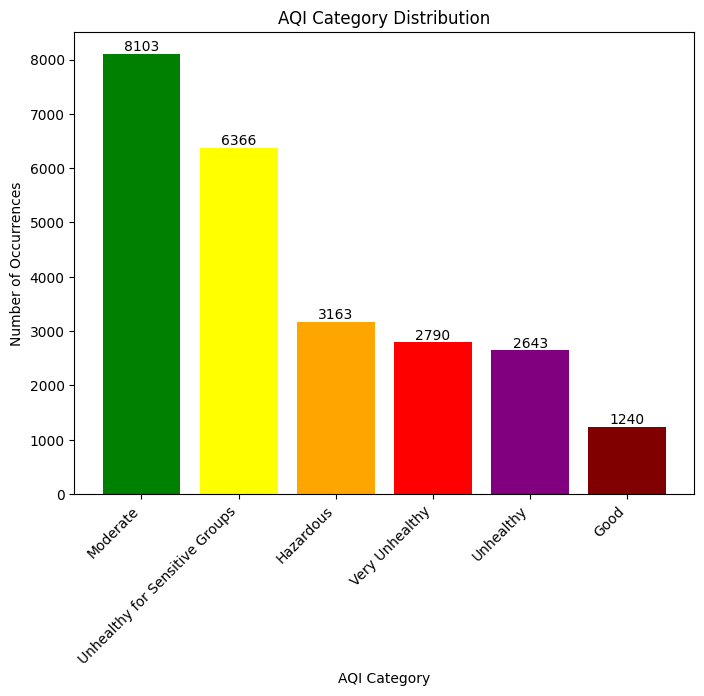

In [17]:
# Define the AQI ranges and corresponding categories
aqi_ranges = [0, 50, 100, 150, 200, 300, 500]
categories = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

# Create a new column 'Category' based on the AQI ranges
df['Category'] = pd.cut(df['AQI'], bins=aqi_ranges, labels=categories, right=False)

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Set the chart size
plt.figure(figsize=(8, 6))
plt.xticks(rotation=45, ha='right')

# Plot the bar chart
bars = plt.bar(category_counts.index, category_counts.values, color=['green', 'yellow', 'orange', 'red', 'purple', 'maroon'])
plt.xlabel('AQI Category')
plt.ylabel('Number of Occurrences')
plt.title('AQI Category Distribution')

# Display the value on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 1), ha='center', va='bottom', color='black')
plt.show()


In [18]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Category'],
      dtype='object')

<Axes: >

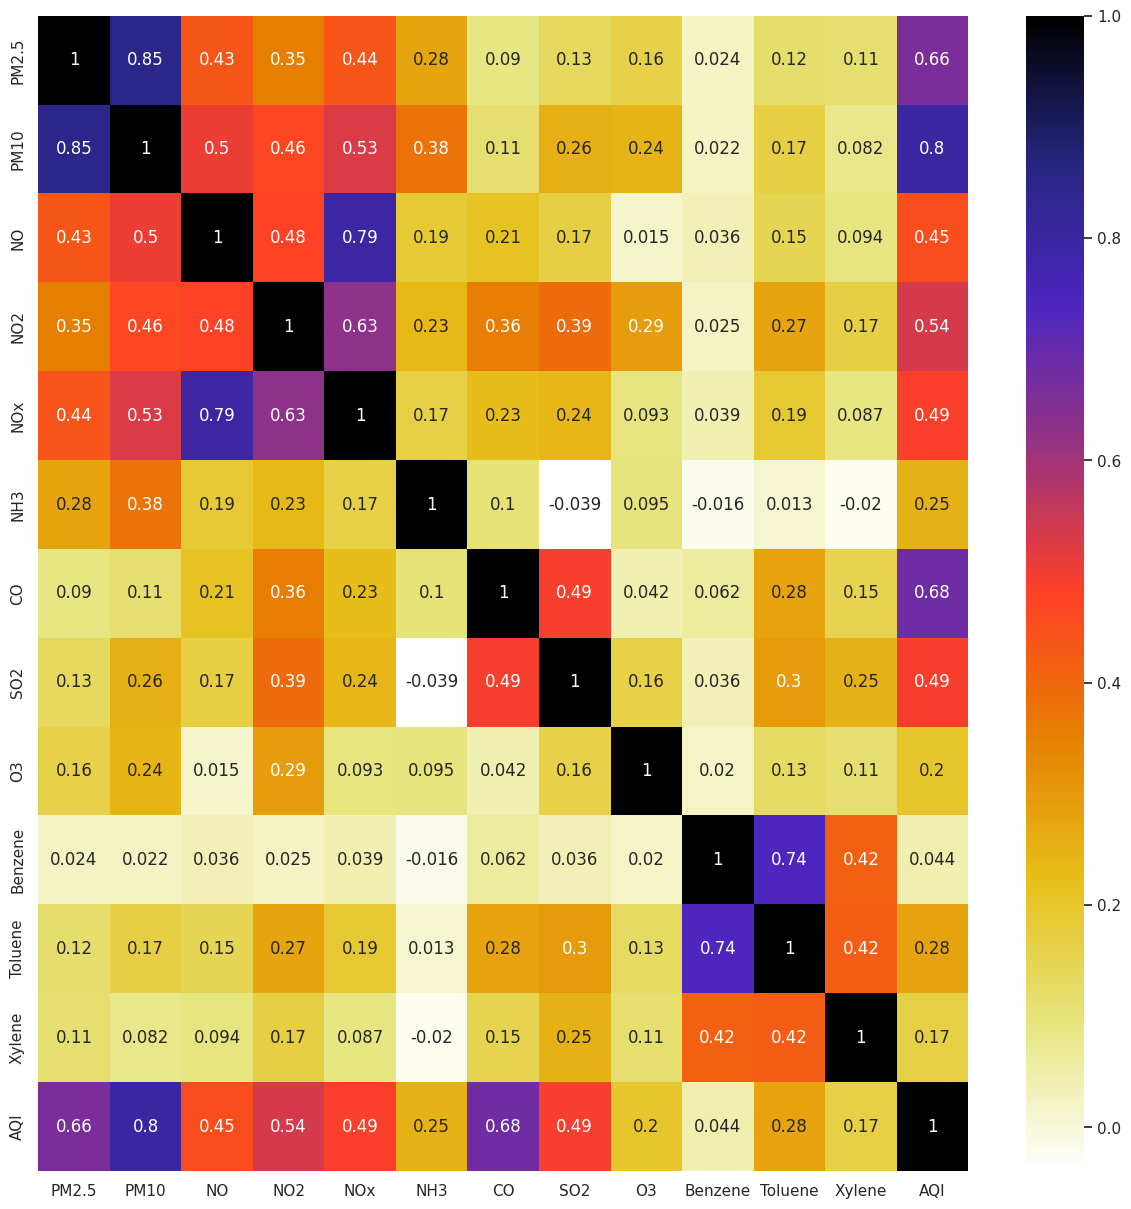

In [19]:
df_heat_map = df.drop(columns=['City', 'Date', 'AQI_Bucket', 'Category'], axis=1)
plt.figure(figsize=(15,15))
sns.set()
sns.heatmap(df_heat_map.corr(), annot=True, cmap=plt.cm.CMRmap_r)

# <span style="font-family:cursive;text-align:center">⚙️ Data Preprocessing</span>

### **Handling Missing Values**

In [20]:
missing_val_df

,% Missing
Xylene,61.32
PM10,37.72
NH3,34.97
Toluene,27.23
Benzene,19.04
AQI,15.85
AQI_Bucket,15.85
PM2.5,15.57
NOx,14.17
O3,13.62


In [21]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Category       5226
dtype: int64

In [22]:
# Dropping columns having missing values greater than 50% and unecessary columns
df = df.drop(columns=["City", "Xylene", 'Date', "AQI_Bucket", "Category"], axis=1)

In [23]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>droping the null values becaouse when we drop null vlaue using mean that increase outlier in the dataset</b><br>
</div>

In [24]:
# removing null with mean 
df1 = df.copy()
df1 = df1.dropna()

In [25]:
df1.isna().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Now there is no null values in dataset 

In [26]:
# Saving the clean data into csv file 
# df1.to_csv("clean_AQI_data.csv", index=False)

In [27]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI'],
      dtype='object')

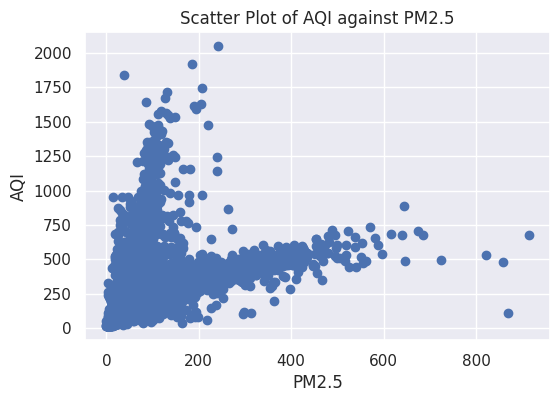

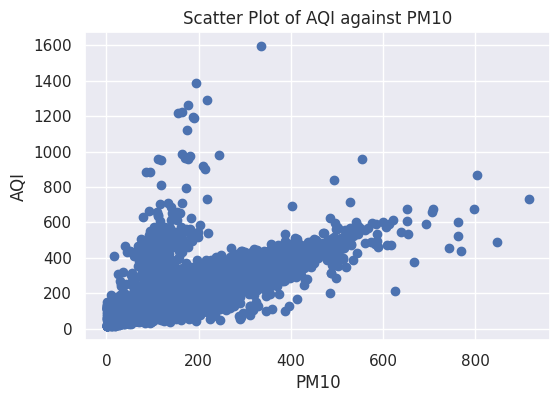

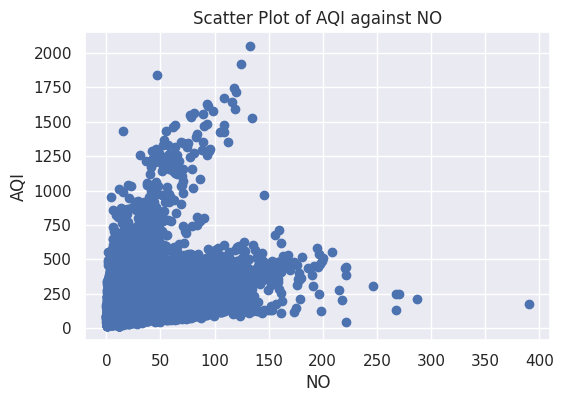

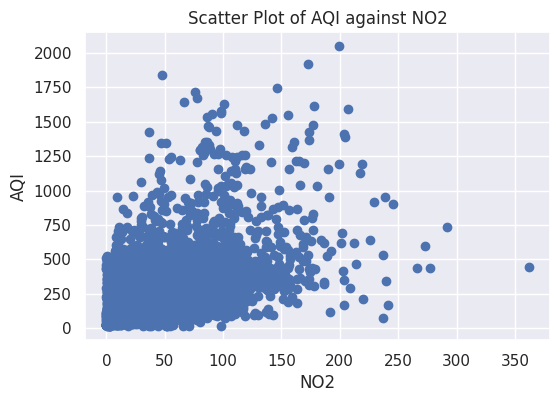

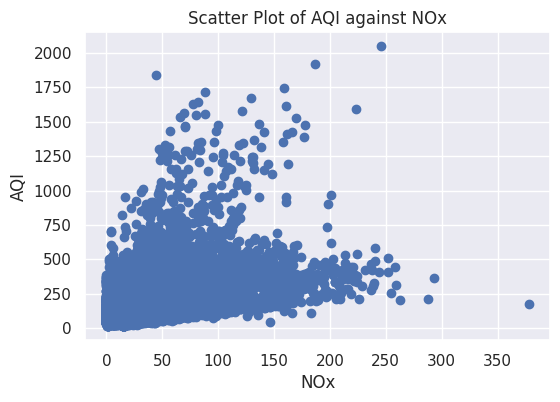

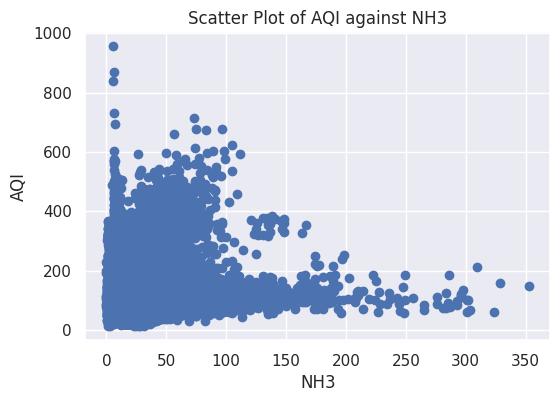

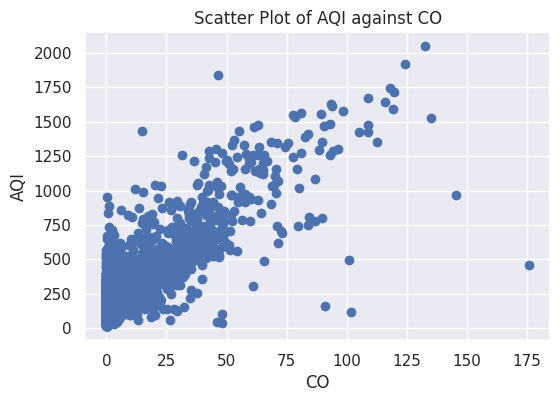

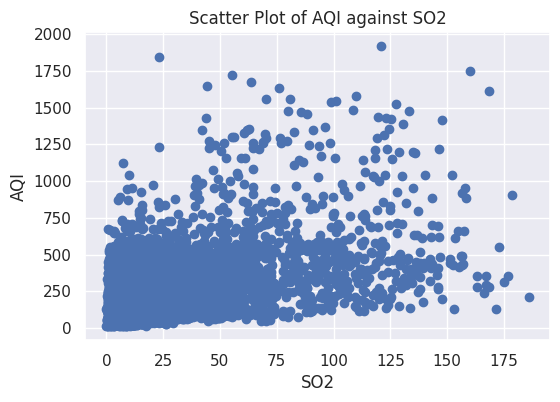

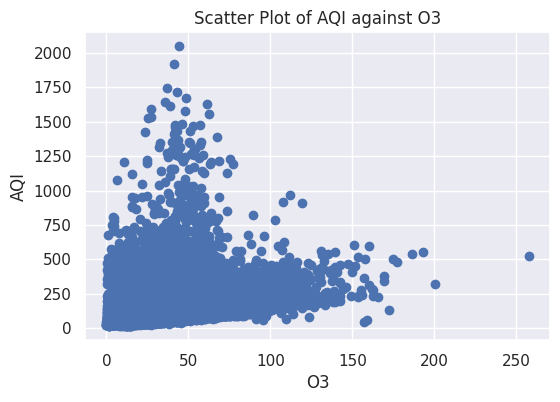

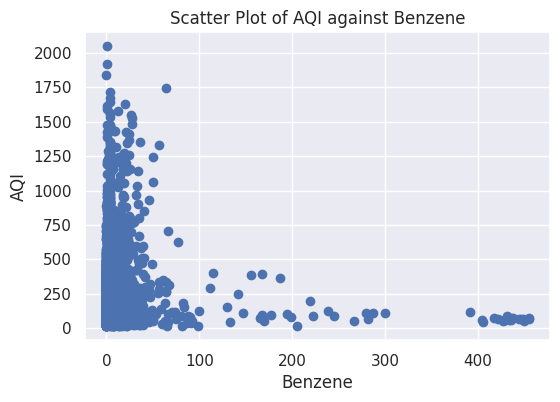

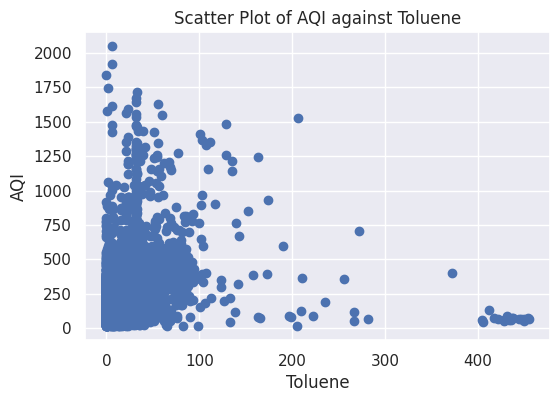

In [28]:
for col in df1.drop('AQI', axis=1).columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df['AQI'])
    plt.title(f'Scatter Plot of AQI against {col}')
    plt.xlabel(col)
    plt.ylabel('AQI')
    plt.show()

### Dealing with Outliers

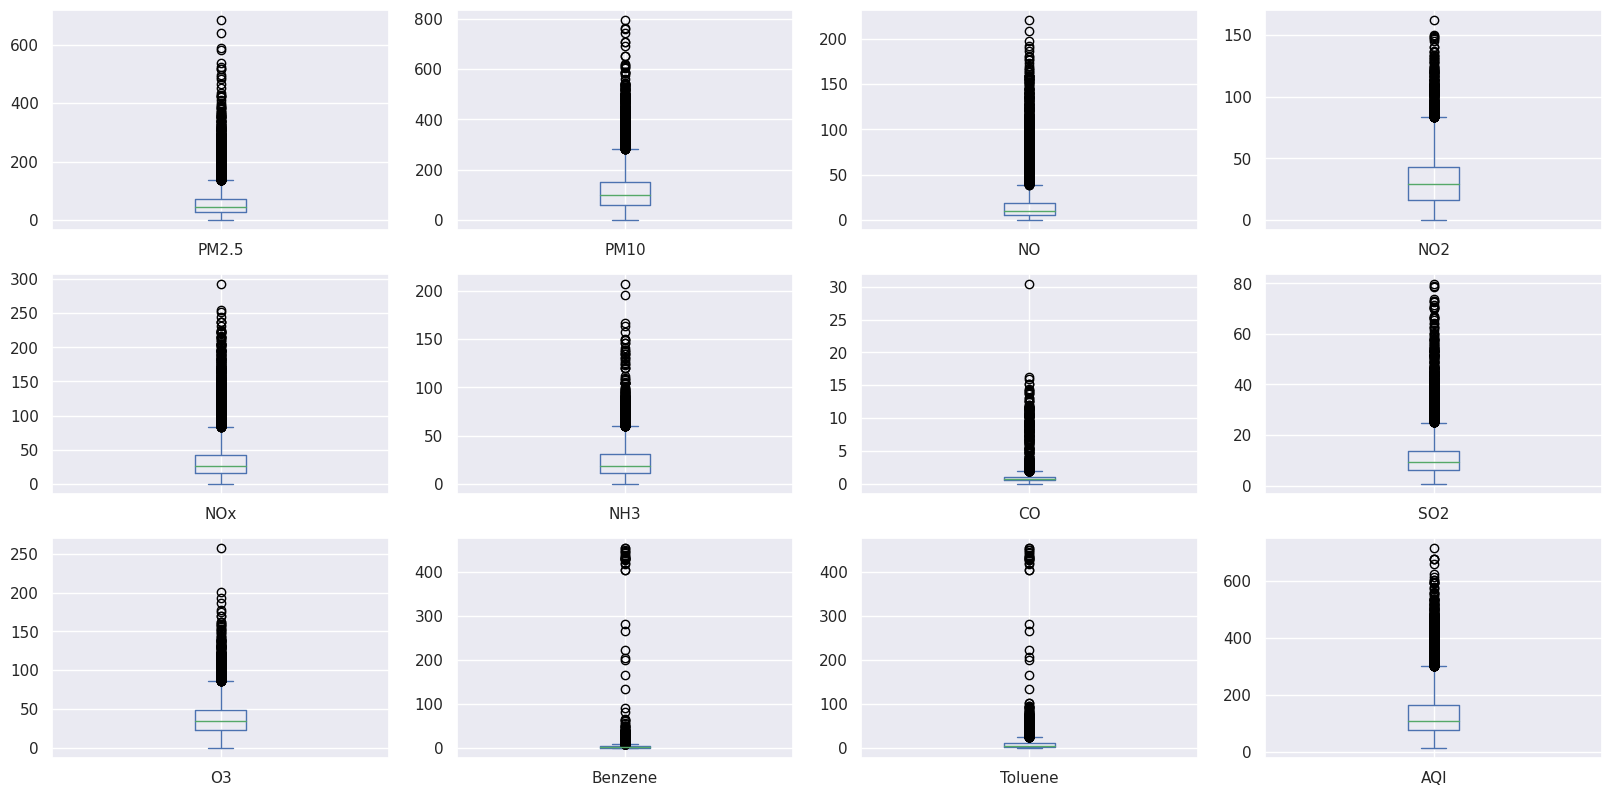

In [29]:
df1.plot(kind="box", 
                vert=True,
                subplots=True, 
                layout = (6,4), 
                figsize=(20,20), 
                sharex=False, 
                sharey=False);

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Almost all feature columns have outlier


In [30]:
for i in df1.columns:
    IQR=df1[i].quantile(0.75)-df1[i].quantile(0.25)
    lower=df1[i].quantile(0.25)-(IQR*1.5)
    upper=df1[i].quantile(0.75)+(IQR*1.5)
    
    outliers=[]
    
    for j in df[i]:
        if j<lower:
            outliers.append(j)
    for k in df[i]:
        if k>upper:
            outliers.append(k)
    print(f'The percentage of outliers in {i}:',(len(outliers)/len(df1)*100),'%')
    

The percentage of outliers in PM2.5: 24.525999624554156 %
The percentage of outliers in PM10: 10.53125586634128 %
The percentage of outliers in NO: 25.023465365121083 %
The percentage of outliers in NO2: 8.259808522620613 %
The percentage of outliers in NOx: 16.444527876853765 %
The percentage of outliers in NH3: 10.399849821663224 %
The percentage of outliers in CO: 40.21024967148489 %
The percentage of outliers in SO2: 30.40172705087291 %
The percentage of outliers in O3: 6.42012389712784 %
The percentage of outliers in Benzene: 12.446029660221514 %
The percentage of outliers in Toluene: 19.38239159001314 %
The percentage of outliers in AQI: 34.49408672798949 %


In [31]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1
IQR

PM2.5      43.8625
PM10       88.9750
NO         13.4775
NO2        26.7275
NOx        27.1425
NH3        19.3375
CO          0.5600
SO2         7.5375
O3         25.2975
Benzene     3.3700
Toluene     9.3900
AQI        90.0000
dtype: float64

In [32]:
df1.shape

(10654, 12)

In [33]:
# Align each DataFrame or Series separately
df1, Q1 = df1.align(Q1, axis=1, copy=False)
df1, Q3 = df1.align(Q3, axis=1, copy=False)
df1, IQR = df1.align(IQR, axis=1, copy=False)

# Apply the condition after aligning
df_iqr = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr.shape

(7433, 12)

### After removing the outlier

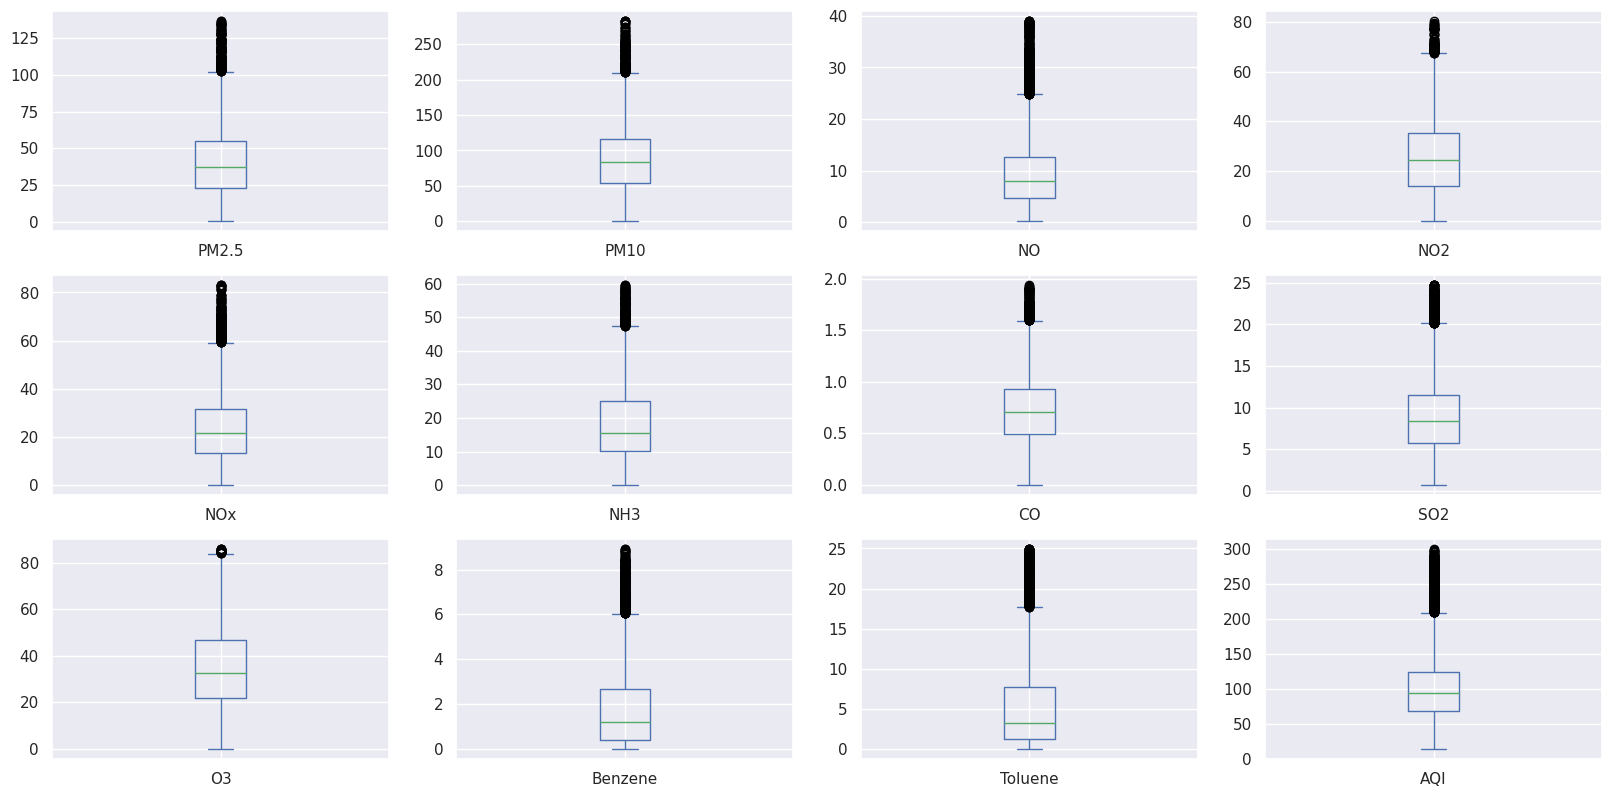

In [34]:
df_iqr.plot(kind="box", 
                vert=True,
                subplots=True, 
                layout = (6,4), 
                figsize=(20,20), 
                sharex=False, 
                sharey=False);

In [35]:
X = df_iqr.drop("AQI", axis =1)
y = df_iqr['AQI']

## Spliting the Dataset into Train and Test

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)

In [37]:
X_train.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
16869,40.63,99.92,7.92,29.49,33.29,19.85,0.79,7.61,69.35,0.39,0.88
17585,27.29,68.45,8.68,37.40,37.66,42.40,0.85,12.39,62.14,1.14,24.02
28668,81.56,161.53,5.29,18.27,13.07,4.64,0.72,10.34,29.31,6.56,16.56
28744,16.60,72.27,12.23,27.91,24.92,8.10,0.52,16.18,14.68,4.06,7.88
17411,36.65,88.55,10.34,21.14,28.30,46.56,0.72,11.59,27.36,0.81,4.29


In [38]:
print("Shape of X training data: ", X_train.shape)
print("Shape of X test data: ", X_test.shape)

Shape of X training data:  (5203, 11)
Shape of X test data:  (2230, 11)


In [39]:
print("Shape of y training data: ", y_train.shape)
print("Shape of y test data: ", y_test.shape)

Shape of y training data:  (5203,)
Shape of y test data:  (2230,)


# **Feature Engineering**

In [40]:
models = {
    "LR": LinearRegression(),
    "GrandBoostReg": GradientBoostingRegressor(),
    "KNR": KNeighborsRegressor(),
    "rfr": RandomForestRegressor()
}

In [41]:
def model_evaluations(models, X_train, X_test, y_train, y_test, params=None):
    r2_dict = dict()
    final_models = dict()
    
    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        final_models[model_name] = model
        
        # Make predictions on unseen data
        y_pred = model.predict(X_test)
        
        # Calculate R2 score with the appropriate average setting
        r2_dict[model_name] = r2_score(y_test, y_pred, multioutput='uniform_average') 

    return r2_dict, final_models

In [42]:
r2_dict, final_models = model_evaluations(models, X_train, X_test, y_train, y_test)

In [43]:
final_models

{'LR': LinearRegression(),
 'GrandBoostReg': GradientBoostingRegressor(),
 'KNR': KNeighborsRegressor(),
 'rfr': RandomForestRegressor()}

In [44]:
r2_dict

{'LR': 0.8356026560032711,
 'GrandBoostReg': 0.8674279441387858,
 'KNR': 0.8588734538154051,
 'rfr': 0.8747495088245665}

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Out of all Classifier Algo **Random Forest Regressor** perform best
* Performing Hyper-Parameter tunning inorder to improve the accuracy

In [45]:
rf_model = RandomForestRegressor()

In [47]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [49]:
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.8760612165635857


In [58]:
input_arr = [100.38,34.57,0.95,32.78,37.66,8.52,0.95,6.32,21.100,0.00,0.05]
input_np_arr = np.asarray(input_arr)
reshaped_arr = input_np_arr.reshape((1, -1))
rf_model.predict(reshaped_arr)

array([164.72])

In [56]:
joblib.dump(rf_model, "RandomForestRegressor.joblib")

['RandomForestRegressor.joblib']